LHW6 Part 2.1

In [92]:
(m,n)=(12,3);
A = rand(m,n) + im*rand(m,n)
P = A*inv(conj(A)'*A)*conj(A)'
eigen(P).values

12-element Vector{ComplexF64}:
   -5.43799200709795e-15 - 3.4460021515918815e-15im
  -1.336002927684732e-15 + 3.5290830693988806e-16im
 -3.8230673230906824e-16 + 2.1108322986767517e-16im
 -2.6556447472125373e-16 + 2.9125251153830257e-16im
  -2.293550090501266e-16 + 1.3459269859235849e-15im
  1.0180465555727776e-17 - 4.113445294197653e-16im
  1.0997440224596413e-16 + 2.344783019330895e-17im
  2.0022292823588314e-16 - 1.6923925292792726e-16im
  1.6684151478654145e-15 + 2.0139280670956292e-16im
      0.9999999999999966 - 1.970645868709653e-15im
      0.9999999999999982 + 7.105427357601002e-15im
      1.0000000000000016 + 6.571891468520885e-16im

2.1.1 The eigenvalues of P  are n 1s and m-n zeros! 

In [97]:
H= I-2*P
norm(conj(H)'*H - I)

5.644427756542353e-13

2.1.2 It is the identity! 

In [99]:
lambdas = eigen(H).values

12-element Vector{ComplexF64}:
 -1.0000000000000016 - 7.549516567451064e-15im
 -1.0000000000000013 - 4.672152421891784e-15im
 -0.9999999999999942 + 2.4702462297909733e-15im
  0.9999999999999981 - 3.3578012332419194e-15im
  0.9999999999999989 - 2.7755575615628914e-16im
                 1.0 - 1.942890293094024e-16im
                 1.0 + 3.608224830031759e-16im
  1.0000000000000004 + 0.0im
  1.0000000000000009 - 8.881784197001252e-16im
  1.0000000000000013 - 8.673617379884035e-18im
  1.0000000000000018 + 3.056365924236637e-15im
  1.0000000000000158 - 1.6514567491299204e-15im

Looks like I have n "-1"s and m-n "1"s.  

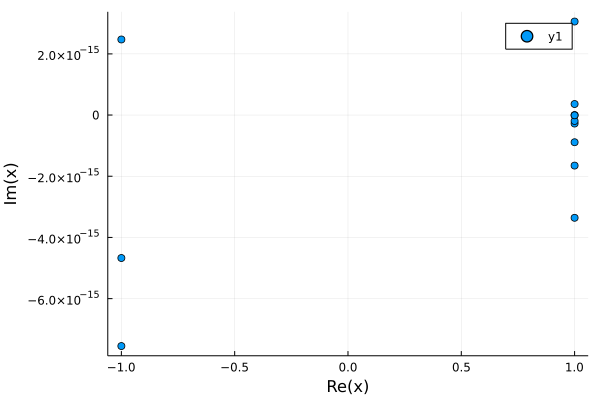

In [103]:
using Plots
plot(lambdas,seriestype = :scatter)

The imaginary bits are tiny! 

# Useful Julia Fragments

Taken from the "disucssions" week 3. Thanks everyone. 

In [ ]:
import Pkg; Pkg.add("PyPlot")

In [ ]:
import Pkg; Pkg.add("PyP
using PyPlot
(m,n)=(12,15)
B=rand(m,n)
matshow(B)

   Resolving package versions...
  No Changes to `C:\Users\AllanStruthers\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\AllanStruthers\.julia\environments\v1.6\Manifest.toml`
Precompiling project...
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR


In [ ]:
using PyPlot
imshow(B)
colorbar()